In [1]:
from PIL import Image
import glob
import tensorflow as tf
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, Input
from keras.utils import np_utils
from keras.layers import Add
from keras.layers import concatenate
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.image as mpimg
%matplotlib inline
import math 
import datetime
import time



#  Camera model 

image_list = []

def my_load_Train_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Camera Images/training/train/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

def my_load_Test_data_1() :
    image_list = []
    for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Camera Images/testing/test/*.jpg'): #assuming gif
        im=Image.open(filename)
        img = im.resize((32,32),Image.ANTIALIAS)
        img= tf.keras.preprocessing.image.img_to_array(img)
        img= img.reshape(32, 32, 3)
        img =img.astype('float32')
        img = img / 255.0
        image_list.append(img)

    return image_list

X1_train = my_load_Train_data_1()
X1_test = my_load_Test_data_1()
#print(len(X1_test))
y1_train = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Camera Images/training/y_labels.csv')
y1_test = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/Thesis Research/Camera Images/testing/y_test_labels.csv')
y1_test.values.reshape(-1,1)

n_classes = 8
X1_train = np.array(X1_train)
Y1_train = np.array(y1_train)
X1_test = np.array(X1_test)
Y1_test = np.array(y1_test)

Y1_train = np_utils.to_categorical(Y1_train, n_classes)
Y1_test = np_utils.to_categorical(Y1_test, n_classes)
# len(X1_train)
# print(Y1_test)
X1_train.shape
Y1_train.shape

# #Secound Camera model

# image_list = []

# def my_load_Train_data_2() :
#     image_list = []
#     for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/train/training/*.jpg'): #assuming gif
#         im=Image.open(filename)
#         img = im.resize((32,32),Image.ANTIALIAS)
#         img= tf.keras.preprocessing.image.img_to_array(img)
#         img= img.reshape(32, 32, 3)
#         img =img.astype('float32')
#         img = img / 255.0
#         image_list.append(img)

#     return image_list

# def my_load_Test_data_2() :
#     image_list = []
#     for filename in glob.glob('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/test/testing/*.jpg'): #assuming gif
#         im=Image.open(filename)
#         img = im.resize((32,32),Image.ANTIALIAS)
#         img= tf.keras.preprocessing.image.img_to_array(img)
#         img= img.reshape(32, 32, 3)
#         img =img.astype('float32')
#         img = img / 255.0
#         image_list.append(img)

#     return image_list

# X2_train = my_load_Train_data_2()
# X2_test = my_load_Test_data_2()
# print(len(X2_test))
# y2_train = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/y_labels.csv')
# y2_test = pd.read_csv('C:/Users/MANDEEP SINGH SHERRY/Desktop/sensor fusion/y_test_labels.csv')
# y2_test.values.reshape(-1,1)

# n_classes = 4
# X2_train = np.array(X2_train)
# Y2_train = np.array(y2_train)
# X2_test = np.array(X2_test)
# Y2_test = np.array(y2_test)

# Y2_train = np_utils.to_categorical(Y2_train, n_classes)
# Y2_test = np_utils.to_categorical(Y2_test, n_classes)


# Model 1(camera)

inp1 = Input(shape=(32, 32, 3))

# convolutional layer
conv1=Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inp1)

# convolutional layer
conv2 =Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv1)
pool1=MaxPool2D(pool_size=(2,2))(conv2)
conv3=Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(pool1)
pool2=MaxPool2D(pool_size=(2,2))(conv3)

# flatten output of conv
flat1=Flatten()(pool2)

# hidden layer
hidd1=(Dense(25, activation='relu'))(flat1)
dense1=(Dense(10, activation='relu'))(hidd1)
#output1=Flatten()(dense1)

#output= (Dense(10, activation='relu'))(model_1)

# # Model 2

# # convolutional layer
# inp2 = Input(shape=(32, 32, 3))

# # convolutional layer
# conv1 =Conv2D(100, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(inp2)

# # convolutional layer
# conv2 =Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(conv1)
# pool1=MaxPool2D(pool_size=(2,2))(conv2)
# conv3=Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu')(pool1)
# pool2=MaxPool2D(pool_size=(2,2))(conv3)

# # flatten output of conv
# flat1=Flatten()(pool2)

# # hidden layer
# hidd1=Dense(25, activation='relu')(flat1)
# dense2=Dense(10, activation='relu')(hidd1)
# output2=Flatten()(dense2)

# for camera model
dense_camera=Dense(8,activation='softmax')(dense1)
output_camera = dense_camera


# # concatinate two models 

# concat1 = concatenate([output1, output2])
# Out  = Dense(4, activation='softmax')(concat1)

# model_concat = Model(inputs=[inp1, inp2], outputs = Out)

# # compiling the sequential model
# model_concat.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 


# # training the model for 10 epochs
# history= model_concat.fit([X1_train,X2_train],Y2_train, batch_size=128,epochs=15,validation_data=([X1_test,X2_test],Y2_test))


# camera model

model_camera = Model(inputs= inp1, outputs = output_camera)
model_camera.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 
history= model_camera.fit(X1_train,Y1_train, batch_size=128,epochs=15,validation_data=(X1_test,Y1_test))



Epoch 1/15
16/16 [==============================] - 26s 2s/step - loss: 2.0707 - accuracy: 0.1532 - val_loss: 2.0149 - val_accuracy: 0.2650
Epoch 2/15
16/16 [==============================] - 22s 1s/step - loss: 1.9644 - accuracy: 0.2776 - val_loss: 1.8446 - val_accuracy: 0.3200
Epoch 3/15
16/16 [==============================] - 22s 1s/step - loss: 1.7314 - accuracy: 0.3499 - val_loss: 1.6260 - val_accuracy: 0.3525
Epoch 4/15
16/16 [==============================] - 22s 1s/step - loss: 1.5205 - accuracy: 0.4037 - val_loss: 1.5163 - val_accuracy: 0.3975
Epoch 5/15
16/16 [==============================] - 22s 1s/step - loss: 1.4230 - accuracy: 0.4329 - val_loss: 1.4363 - val_accuracy: 0.3975
Epoch 6/15
16/16 [==============================] - 22s 1s/step - loss: 1.3646 - accuracy: 0.4289 - val_loss: 1.4006 - val_accuracy: 0.4625
Epoch 7/15
16/16 [==============================] - 22s 1s/step - loss: 1.2381 - accuracy: 0.5393 - val_loss: 1.3047 - val_accuracy: 0.5200
Epoch 8/15
16/16 [==

In [2]:

#model.save_weights(top_model_weights_path)
start = datetime.datetime.now()
(eval_loss, eval_accuracy) = model_camera.evaluate(X1_test,Y1_test, batch_size=128, verbose=1)
print('[INFO] Accuracy: {:.2f}%'.format(eval_accuracy * 100)) 
print('[INFO] Loss: {}'.format(eval_loss)) 
end= datetime.datetime.now()
elapsed= end-start
print ('Time: ', elapsed)

4/4 [==============================] - 1s 250ms/step - loss: 1.0437 - accuracy: 0.6850
[INFO] Accuracy: 68.50%
[INFO] Loss: 1.0437043905258179
Time:  0:00:01.204308


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


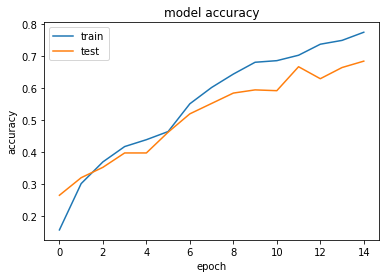

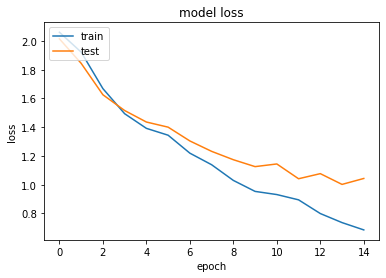

In [3]:
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Input image: specs2_sp1.jpg

probality of Bed:  3.106987848877907

probality of Bottle:  0.00924252817640081

probality of chair:  73.95849823951721

probality of Laptop:  10.745753347873688

probality of Plate:  0.25668609887361526

probality of Sofa:  7.414023578166962

probality of Spectacle:  1.5039708465337753

probality of Table:  3.004840202629566


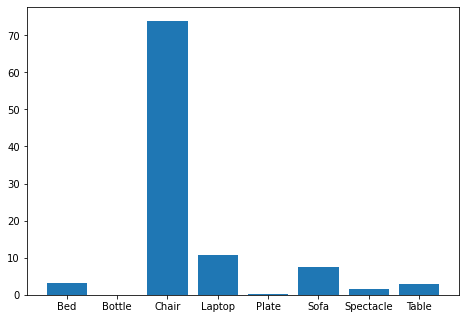

__________________________________________________________________


In [5]:
# make a prediction for a new thermal image.

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

ListPic = {'camera_bed253.jpg','camera_chair258.jpg','camera_sofa255.jpg','camera_table252.jpg',
          'camera_plate273.jpg','camera_bottle248.jpg','camera_laptop253.jpg','camera_spectacle279.jpg'}



for item in ListPic:
 # load the image thermal
 img1 = load_img(item, target_size=(32, 32))

 # convert to array
 img1 = img_to_array(img1)

 # reshape into a single sample with 3 channels
 img1 = img1.reshape(1,32, 32, 3)

 # prepare pixel data
 img1 = img1.astype('float32')
 img1 = img1 / 255.0

 # prediction od data
 result = model_camera.predict(img1)
 
 print('Input image:',item)
 #print(result)
 print('')
 Bed = result[0][0]*100
 print("probality of Bed: ", Bed)
 print()
 Bottle = result[0][1]*100
 print("probality of Bottle: ", Bottle)
 print()
 Chair = result[0][2]*100
 print("probality of chair: ", result[0][2]*100)
 print()
 Laptop = result[0][3]*100
 print("probality of Laptop: ", result[0][3]*100)
 print()
 Plate = result[0][4]*100
 print("probality of Plate: ", result[0][4]*100)
 print()
 Sofa = result[0][5]*100   
 print("probality of Sofa: ", result[0][5]*100)
 print()
 Spectacle = result[0][6]*100
 print("probality of Spectacle: ", result[0][6]*100)
 print()
 Table = result[0][7]*100   
 print("probality of Table: ", result[0][7]*100)
    
 # importing the required module
 import matplotlib.pyplot as plt
  
 fig = plt.figure()
 ax = fig.add_axes([0,0,1,1])    

 # x axis values
 x = ['Bed','Bottle','Chair','Laptop','Plate','Sofa','Spectacle', 'Table']
 # corresponding y axis values
 y = [Bed,Bottle,Chair,Laptop,Plate,Sofa,Spectacle,Table]

 ax.bar(x,y)
 plt.show()   
    
 print("__________________________________________________________________")

 
    
 